# **NFW DENSITY PROFILE**

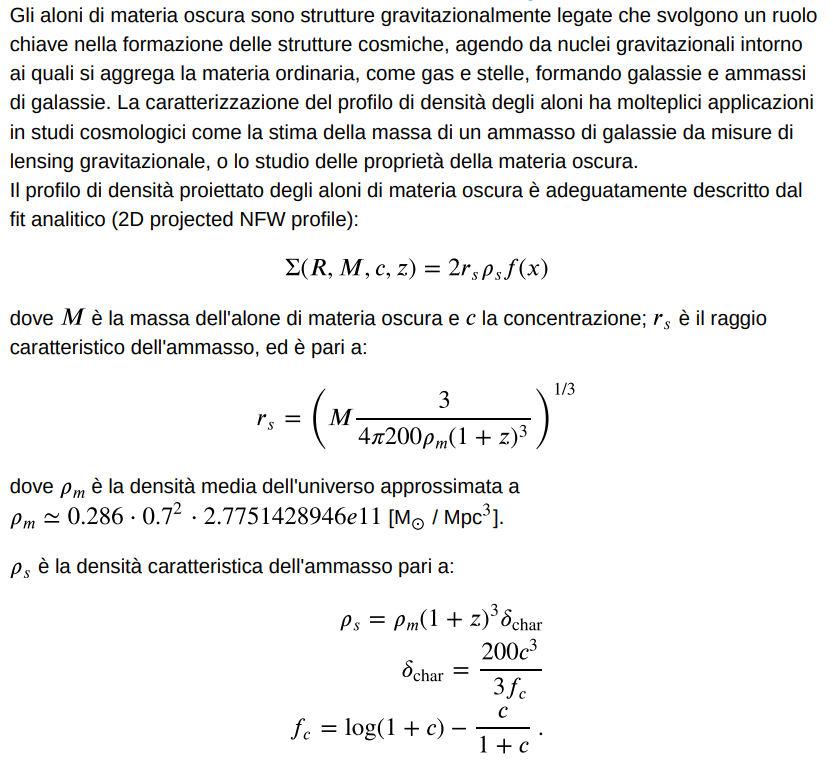

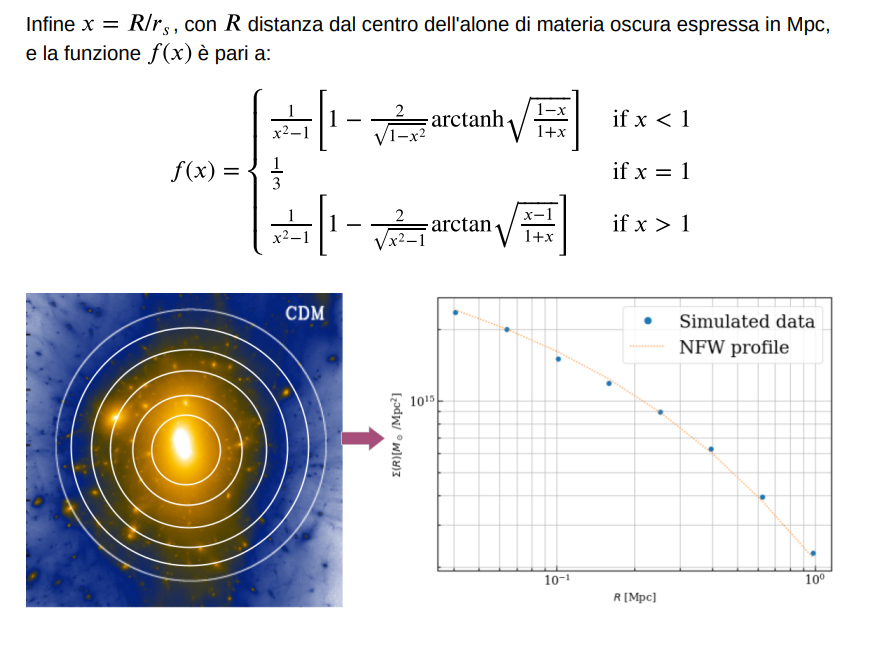

**Implementare la funzione per calcolare SIGMA(R,M,c,z), e mostrare in un grafico
composto da 9 pannelli i profili di densità nell'intervallo R in [0.03,1.0] Mpc, per le
seguenti combinazioni di valori di massa e concentrazione:
M = [10^13.5,10^14,10^15]*Msole;c = [2,5,10] ; z = 0.0. (Suggerimento: usare scala logaritmica per migliorare la
visualizzazione).**



In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
import scipy.stats as stats
import matplotlib.axes as axes

In [ ]:
def NFW(R,M,c,z): #Navarro-Frenk-White profile
    rom = 0.286*(0.7**2)*2.7751428946*(10**11) #densità media dell'universo (in massa solare/(mpc**3))
    den = 4*np.pi*200*rom*(1+z)**3 #per semplicità dò un nome al denominatore di rs
    rs = (M*(3/den))**(1/3) #rs idica il raggio caratteristico dell'ammasso
    fc = math.log(1+c)-(c/(1+c)) #qui il logaritmo è in base e
    deltac = (200*(c**3))/(3*fc) #è il delta char della descrizione dell'esercizio
    ros = (rom*(1+z)**3)*deltac #è la densità caratteristica dell'ammasso

    #definisco la funzione f(x)=func
    x = R/rs
    denf = (x**2)-1 #anche qui per comodità definisco a parte il denominatore della funzione
    func = np.zeros_like(x) #ritorna un array di zeri con stessa shape e type dell'array dato
    for i in range (len(x)):
      if(x[i]<1):
        func[i]=(1-(2*np.arctanh(math.sqrt((1-x[i])/(1+x[i]))))/(math.sqrt(1-x[i]**2)))/denf[i]
      elif(x[i]==1):
        func[i]=1/3
      else:
        func[i]=(1-(2*np.arctan(math.sqrt((x[i]-1)/(1+x[i]))))/(math.sqrt(x[i]**2-1)))/denf[i]

    #calcolo finalmente sigma
    result = 2*rs*ros*func
    return result

(50,)


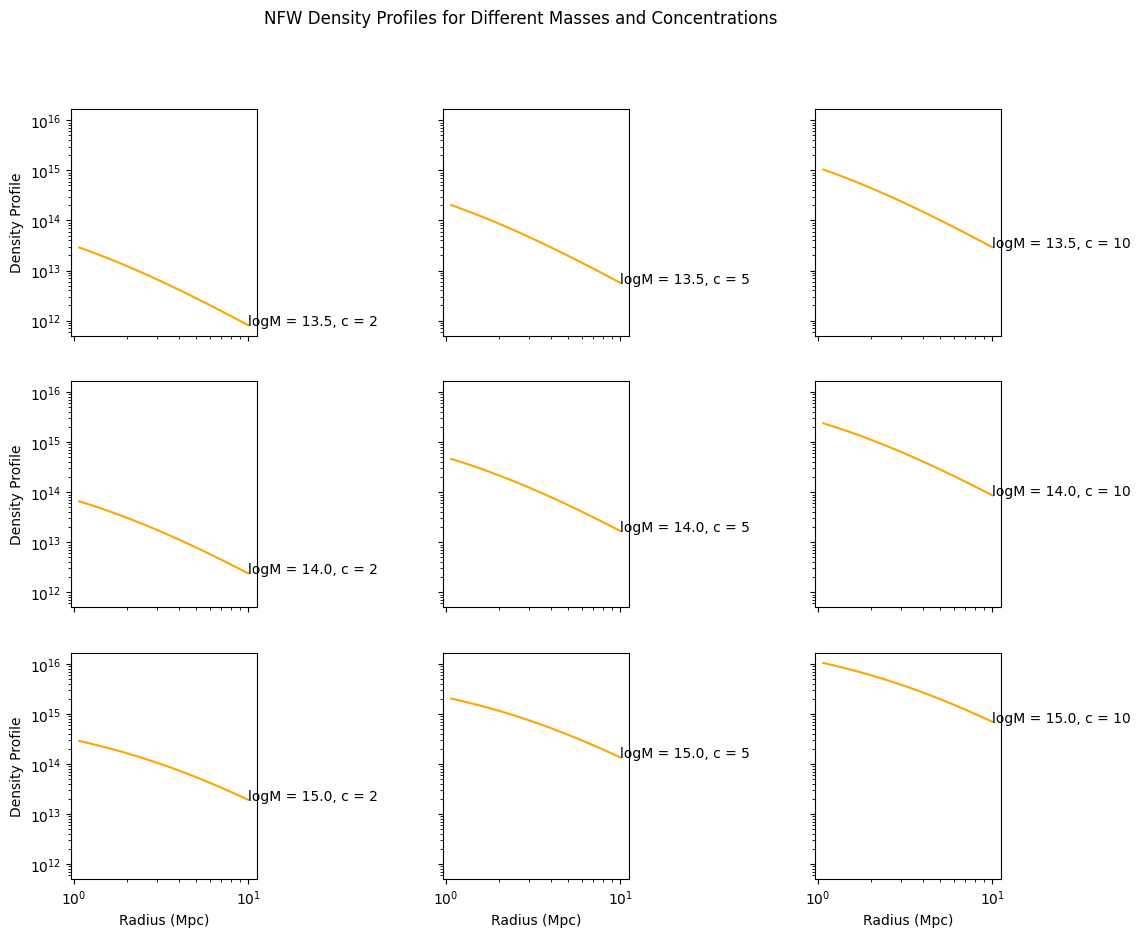

In [ ]:
#ora costruisco il grafico a nove pannelli

# Definizione di massa, concentrazione e raggio
M = [10**13.5, 10**14.0, 10**15.0]   # Masse in unità solari
c = [2, 5, 10] #concentrazione
z = 0.0  # Redshift
R = np.logspace(0.03,1,base = 10) #distanza dal centro dell'alone di materia oscura espressa in Mpc (in scala log come suggerito:  elementi sono disposti in scala logaritmica. Questo significa che gli elementi dell'array sono divisi da un fattore costante.)
print(np.shape(R)) #per curiosità mi faccio stampare il numero di R a cui viene calcolata NFW

# Creazione del grafico a 9 pannelli (sharex,sharey fanno sì che tutti i grafici abbiano stesso asse x e y)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10), sharex=True, sharey=True)

# Calcolo e grafico i profili di densità
for i, mass in enumerate(M):
    for j, concentration in enumerate(c):
        sigma = NFW(R, mass, concentration, z)
        axes[i, j].loglog(R, sigma,'-',color = 'orange',base=10) #faccio il grafico in scala log-log (i logaritmi son calcolati automaticamente,base float, default: 10)
        #Aumento un po' lo spazio tra le colonne dei subplots
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=None)
        #Questo codice imposterà il testo "i = i, j = j" in posizione (r[-1], sigma[-1]), dove r[-1] è l'ultimo valore dell'asse x e sigma[-1] è l'ultimo valore dell'asse y.
        axes[i, j].annotate(f"logM = {np.log10(mass)}, c = {concentration}", (R[-1], sigma[-1]), xycoords='data', color='black', fontsize=10)

# Aggiunta di etichette e titoli al grafico
for i in range(3):
    axes[i, 0].set_ylabel('Density Profile') #scrivo sugli assi y (per ogni massa (=riga) nel caso della concentrazione zero (= prima colonna))
    axes[2, i].set_xlabel('Radius (Mpc)') #scrivo sugli assi x (per ogni concentrazione (=colonna) nel caso dell'ultima massa (=terza riga)

# Impostazione del titolo
plt.suptitle('NFW Density Profiles for Different Masses and Concentrations')

# Visualizzazione del grafico
plt.show()

**COMMENTO:**
In questo modo, si verifica che la funzione per calcolare Σ, è con buona probabilità implementata correttamente in quanto presenta l'andamento atteso, inoltre si verifica subito la dipendenza dalla massa e dalla concentrazione (oltre che dal raggio).
In particolare si può osservare che al variare della massa (a parità di concentrazione) varia la curvatura del profilo di densità(ovvero a parità di massa e concentrazione, varia maggiormente il profilo di densità al variare del raggio quando lavoro con masse minori), mentre al variare della concentrazione(a parità di massa), ho una traslazione verticale del grafico (risulterà un profilo di densità più elevato via via che la concentrazione aumenta).

**Il file halo-catalog.fit contiene i PROFILI DI DENSITA' di 40103 aloni di materia oscura estratti da una simulazione cosmologica N-body, il loro REDSHIFT, e la RICCHEZZA, una somma pesata del numero di galassie che popolano l'alone e che funge da "proxy "per la massa.**
**I nomi delle colonne contenenti i dati sono rispettivamente:**
- **profilo densità='SIGMA_of_R' [Msole, Mpc^2 ],**
- **redshift='Z',**
- **ricchezza='LAMBDA_TR'.**

**I valori di R in [Mpc] a cui sono calcolati i profili di densità si trovano nel file R-values.npy.**

**Suddividere il catalogo in 5 intervalli di ricchezza e calcolare il redshift, profilo di
densita' medio e la sua deviazione standard in funzione di R per ognuno di questi, e
mostrare i risultati in un grafico con 5 pannelli;**

(10185, 8)
(13131, 8)
(5791, 8)
(1565, 8)
(1020, 8)
profilo densità medio ad ogni R, per gruppo
[[6.04037423e+14 4.90045971e+14 3.59895811e+14 2.44186171e+14
  1.57314921e+14 9.94077143e+13 6.32655394e+13 4.25876039e+13]
 [6.71748119e+14 5.49872449e+14 4.07836975e+14 2.78087908e+14
  1.79839928e+14 1.13148976e+14 7.07332627e+13 4.62313887e+13]
 [8.32238229e+14 6.87506824e+14 5.16437068e+14 3.57835368e+14
  2.34592791e+14 1.48061297e+14 9.08488260e+13 5.60359056e+13]
 [1.01748721e+15 8.48186114e+14 6.49396237e+14 4.57530820e+14
  3.03080373e+14 1.91811729e+14 1.16646220e+14 6.98558857e+13]
 [1.30057502e+15 1.09378368e+15 8.51105483e+14 6.10884674e+14
  4.14929710e+14 2.67786933e+14 1.64281526e+14 9.60887783e+13]]

deviazioni standard associate
[[2.64022629e+14 1.89365695e+14 1.29024643e+14 8.42692884e+13
  5.49376481e+13 3.67401233e+13 2.58197873e+13 1.89469609e+13]
 [2.90986786e+14 2.15851702e+14 1.50340230e+14 9.89038610e+13
  6.33444636e+13 4.08677379e+13 2.73329768e+13 1.92529207e+1

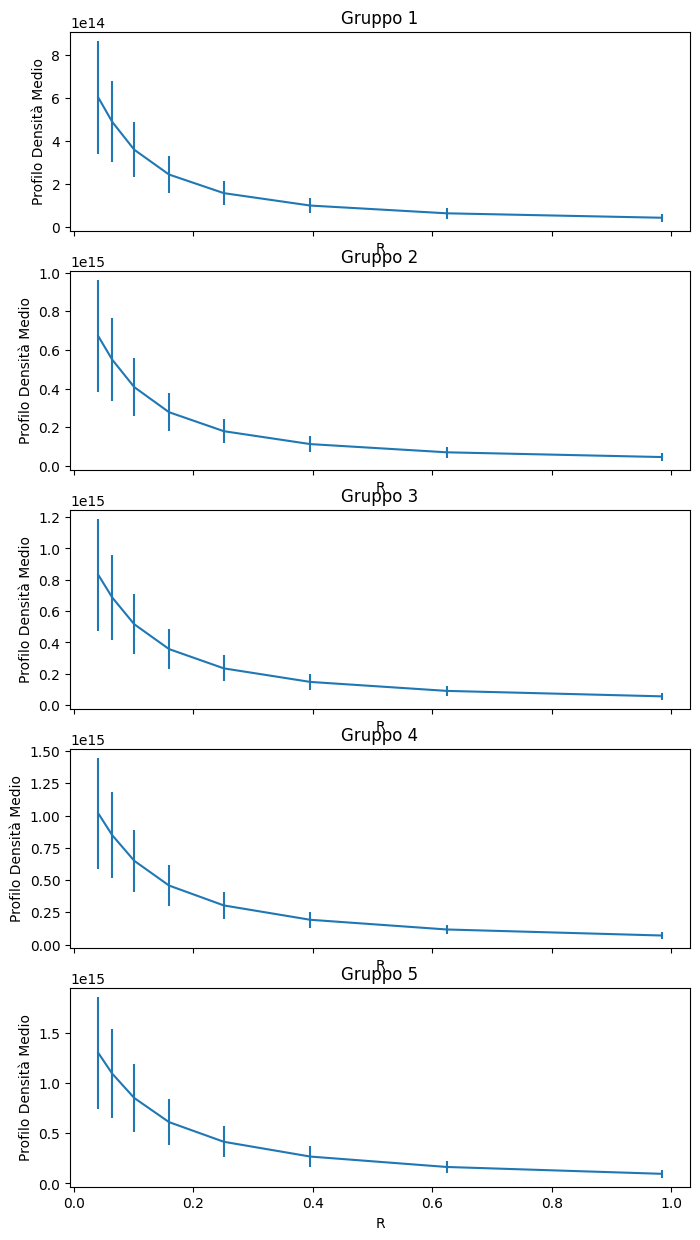

In [ ]:
#estraggo le colonne che mi interessano
catalog_data = fits.getdata('/content/halo_catalog.fit')
#The function getdata() gets the data of an HDU. Similar to getheader(), it only requires the input FITS file name while the extension is specified through the optional arguments.
ricchezza = catalog_data['LAMBDA_TR']
#dp_data = catalog_data['SIGMA_of_R']
#redshift = catalog_data['Z']
R_values = np.load('/content/R_values.npy')

#Definisco gli estremi degli intervalli
estremo = np.array([15,20,30,45,60,200])

# Inizializza i pannelli del grafico
fig, axs = plt.subplots(5, 1, figsize=(8, 15), sharex=True)

#preparo gli array su cui salvare i dati che mi saranno utili successivamente
z_medi_gruppo = np.zeros(5)
pd_medi_gruppo = np.ndarray((5,8))
devstd_pd_medi_gruppo = np.ndarray((5,8))

#Suddivido il catalogo in base agli estremi dati (altrimenti non son  sicura le covarianze siano associate giuste)
for i in range(5):
    if i < 4:
        gruppo = catalog_data[(ricchezza >= estremo[i]) & (ricchezza < estremo[i + 1])]
    else:
        gruppo = catalog_data[(ricchezza >= estremo[i])]

    # Calcolo il redshift medio per gruppo e lo salvo
    z_medio = np.mean(gruppo['Z'])
    z_medi_gruppo[i] = z_medio

    # Calcolo il profilo di densità medio e la deviazione standard per gruppo e li salvo
    prof_dens_medio = np.mean(gruppo['SIGMA_of_R'], axis=0) #faccio una media sull'asse 0 perchè faccio una media per ogni valore di raggio
    pd_medi_gruppo[i] = prof_dens_medio

    dev_std_dp = np.std(gruppo['SIGMA_of_R'], axis=0)
    devstd_pd_medi_gruppo[i] = dev_std_dp

    #print(prof_dens_medio)
    #print(np.shape(prof_dens_medio))
    #print(np.shape(R_values))
    print(np.shape(gruppo['SIGMA_of_R'])) #così vedo anche quanti dati ho per gruppo
    #print(np.shape(dev_std_dp))

    # Plotto il profilo di densità medio in funzione di R
    axs[i].errorbar(R_values, prof_dens_medio, yerr=dev_std_dp, label=f'Gruppo {i+1}')
    axs[i].set_title(f'Gruppo {i+1}')
    axs[i].set_xlabel('R')
    axs[i].set_ylabel('Profilo Densità Medio')

print()
print("profilo densità medio ad ogni R, per gruppo")
print(pd_medi_gruppo)
print()

print("deviazioni standard associate")
print(devstd_pd_medi_gruppo)


**NOTA**: nel file R_values.npy ho 8 valori di raggio. Per ogni gruppo, faccio la media dei profili di densità, però ho anche 8 colonne che corrispondono ai valori di R: otterrò quindi un array ad 8 entrate (che ho chiamato "prof_dens_medio"). Per ognuno dei grafici sopra riportati leggiamo sull'asse y i profili di densità medi del gruppo in esame in funzione dei rispettivi R.
Ovviamente, in corrispondenza delle medie ai diversi raggi, otterrò otto deviazioni standard per gruppo.

**COMMENTO:**
Posso inoltre osservare che:
- in ogni gruppo di ricchezza, l'andamento del profilo di densità al variare del raggio resta lo stesso, e diminuisce all'aumentare della distanza, in accordo con quanto atteso visto le formule date;
- all'aumentare della ricchezza, aumenta a parità di raggio il profilo di densità medio, anche questo in accordo con le aspettative del modello;
- all'aumentare della ricchezza, aumenta inoltre anche la deviazione standard dei dati a parità di raggio, e la stessa diminuisce all'aumentare del raggio in ognuno dei gruppi. Questo potrebbe essere dovuto al fatto che se sigma è una funzione decrescente del raggio, la deviazione standard tenderà a diminuire all'aumentare del valore di R. Questo perché la dispersione dei dati intorno alla media di sigma diminuisce man mano che R aumenta.

**NOTA**: Lo stesso posso fare il scala loglog, e osservo che trovo degli andamenti coerenti con quanto atteso per il profilo di densità in funzione del raggio in scala logaritmica come nel grafico a nove pannelli tracciato precedentemente.

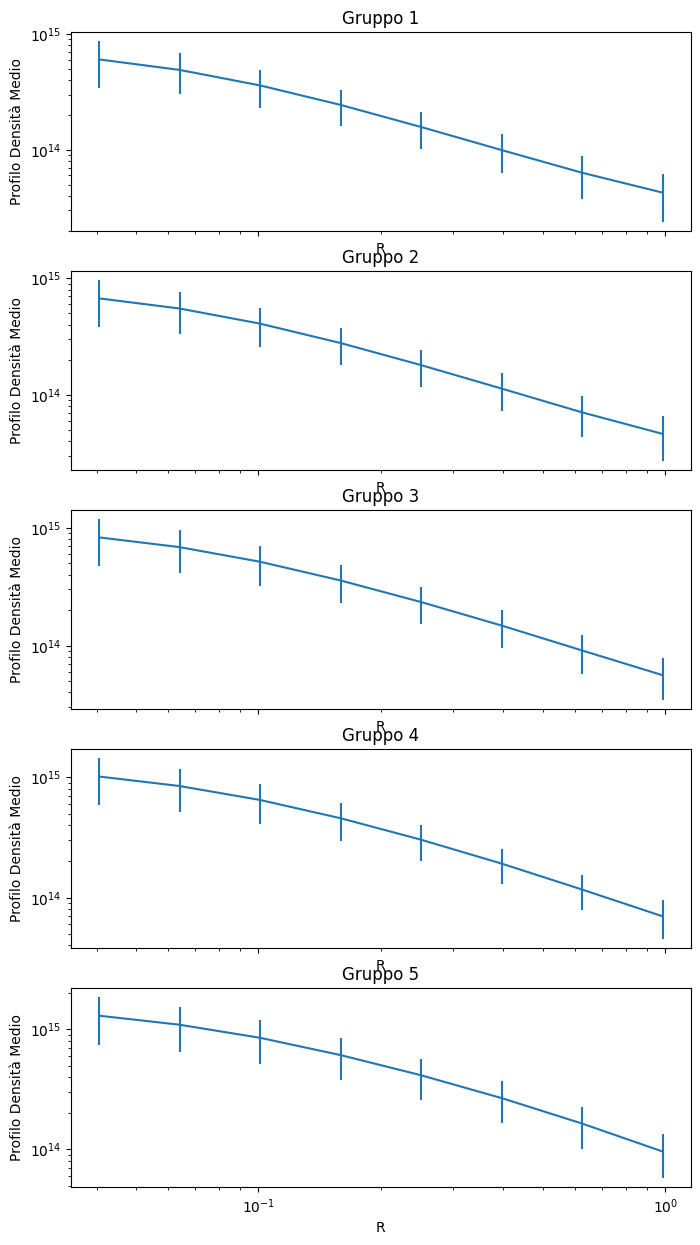

In [ ]:
#stessi grafici in scala loglog
fig, axs = plt.subplots(5, 1, figsize=(8, 15), sharex=True)
for i in range(5):
    # Plotto il profilo di densità medio in funzione di R in scala log log
    axs[i].set_xscale("log")
    axs[i].set_yscale("log")
    axs[i].errorbar(R_values, pd_medi_gruppo[i], yerr=devstd_pd_medi_gruppo[i], label=f'Gruppo {i+1}')
    axs[i].set_title(f'Gruppo {i+1}')
    axs[i].set_xlabel('R')
    axs[i].set_ylabel('Profilo Densità Medio')


**COMMENTO**: In questa scala vedo anche che le deviazioni standard mi appaiono tutte abbastanza simili, non ho più la grossa differenza del grafico precedente, essendo ora i dati più omogenei in termini di ordini di grandezza. Infatti quando si trasformano i dati in scala loglog, la deviazione standard per valori più piccoli di Σ viene amplificata, mentre la deviazione standard per valori più elevati di Σ viene attenuata. Questo porta a una convergenza delle deviazioni standard.

**Usando il fit analtico NFW, stimare per ogni bin di ricchezza la massa (log10M) e la
concentrazione media. A tal scopo si assuma una likelihood Gaussiana utilizzando le
matrici di covarianza fornite nel file Sigma-cov.npy per ogni intervallo di ricchezza,
e i seguenti prior uniformi per i parametri: logM in [13,16] e c in [0.2, 20];
ogni bin di ricchezza si utilizzi il relativo redshift medio. Usare il sofware emcee per
derivare i posteriors sui parametri;**

**NOTA:** L'idea è quella di ottenere, attraverso il metodo EMCEE un campione Monte Carlo che segua la Posterior Distribution, ovvero la distribuzione di probabilità dei parametri logM e c che voglio stimare a partire dai profili di densità degli aloni (dati) e dal modello NFW per il calcolo di questi profili.
In questo modo, analizzando le distribuzioni marginali della Posterior, potrò risalire alla massa e alla concentrazione media per ogni bin, e alle relative deviazioni standard.

Per la Likelihood, la formula a cui si farà riferimento sarà la seguente:
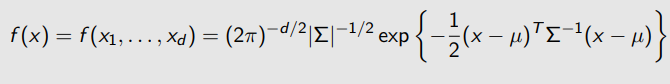


In [ ]:
#Calcolo la posterior distribution del profilo di densità (N.B. lavoro sempre in scala logaritmica)

#Carico i dati che mi servono
cov_matrix = np.load('/content/covariance_matrices.npy')

#print(cov_matrix)
#print(np.shape(cov_matrix))

# Definisco la logLikelihood --> probabilità di ottenere i dati se fissati certi parametri e un dato modello.
def logLikelihood(theta, r, dp_data, cov_matrix,z):
    logM, c = theta
    M = 10**(logM)
    dp_model = NFW(r,M, c, z)
    diff = dp_data - dp_model
    cov_inv = np.linalg.inv(cov_matrix)
    logGauss = -0.5 * np.dot(diff, np.dot(cov_inv, diff)) #sarebbe +costante (dati fattori della f(x) sopra) che però sono una traslazione della pdf, non cambiano il contenuto statistico
    return logGauss

# Definisco la logPrior --> probabilità dei parametri del modello.
def logPrior(theta):
    logM, c = theta
    if 13.0 <= logM <= 16.0 and 0.2 <= c <= 20.0:
        return 0.0
    return -np.inf

# Definisco la logPosterior --> probabilità dei parametri una volta scelto il modello e raccolti i dati.
def logPosterior(theta, r, dp_data, cov_matrix,z):
    logP = logPrior(theta)
    if not np.isfinite(logP):
        return -np.inf
    logL = logLikelihood(theta, r, dp_data, cov_matrix,z)
    return logP + logL


**NOTA**: La matrice delle covarianze, sarà un array con shape (5,8,8) perchè per ogni gruppo, contiene le covarianze tra le medie dei profili di densità (che sono una per raggio). Quindi alla NFW devo dare come dati il raggio(8 valori), il valore MEDIO del profilo di densità per ogni gruppo (8 valori) con rispettive covarianze e il redshift MEDIO per gruppo (8 valori).




Gruppo: 1
Best-fit parameters: [13.04727907  2.6771214 ]


100%|██████████| 2800/2800 [00:18<00:00, 150.56it/s]
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


autocorr_time: [32.61972516 36.32205036]
flat samples shape: (88000, 2)
samples shape: (2800, 32, 2)

Gruppo: 2
Best-fit parameters: [13.06843718  2.79772662]


100%|██████████| 2800/2800 [00:16<00:00, 170.40it/s]
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


autocorr_time: [34.87455315 38.99679677]
flat samples shape: (88000, 2)
samples shape: (2800, 32, 2)

Gruppo: 3
Best-fit parameters: [13.1081835   3.06711247]


100%|██████████| 2800/2800 [00:16<00:00, 172.67it/s]
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


autocorr_time: [35.63610051 35.48350166]
flat samples shape: (88000, 2)
samples shape: (2800, 32, 2)

Gruppo: 4
Best-fit parameters: [13.15976605  3.31349559]


100%|██████████| 2800/2800 [00:20<00:00, 136.08it/s]


autocorr_time: [32.20024877 32.44638192]
flat samples shape: (88000, 2)
samples shape: (2800, 32, 2)

Gruppo: 5
Best-fit parameters: [13.26737028  3.56817403]


100%|██████████| 2800/2800 [00:27<00:00, 100.89it/s]


autocorr_time: [43.39628323 42.21362097]
flat samples shape: (88000, 2)
samples shape: (2800, 32, 2)


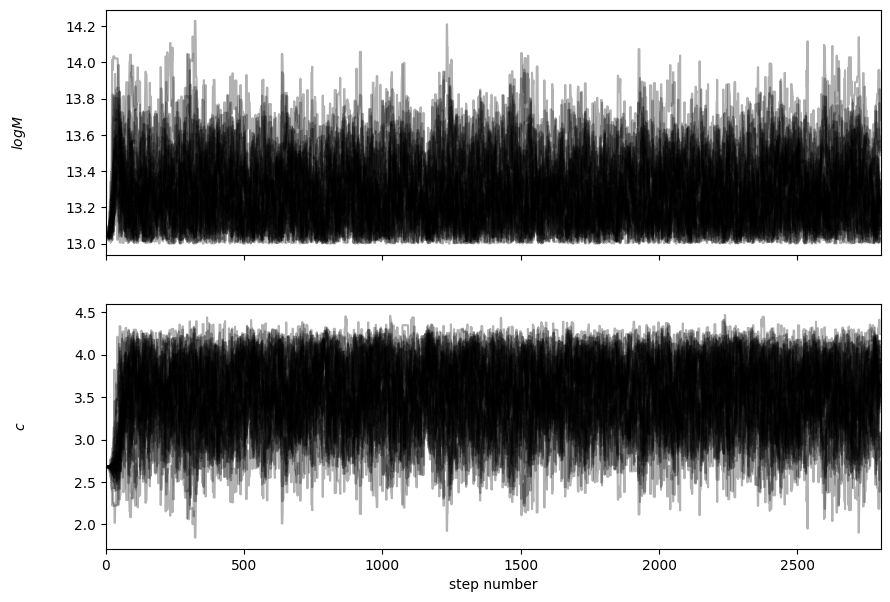

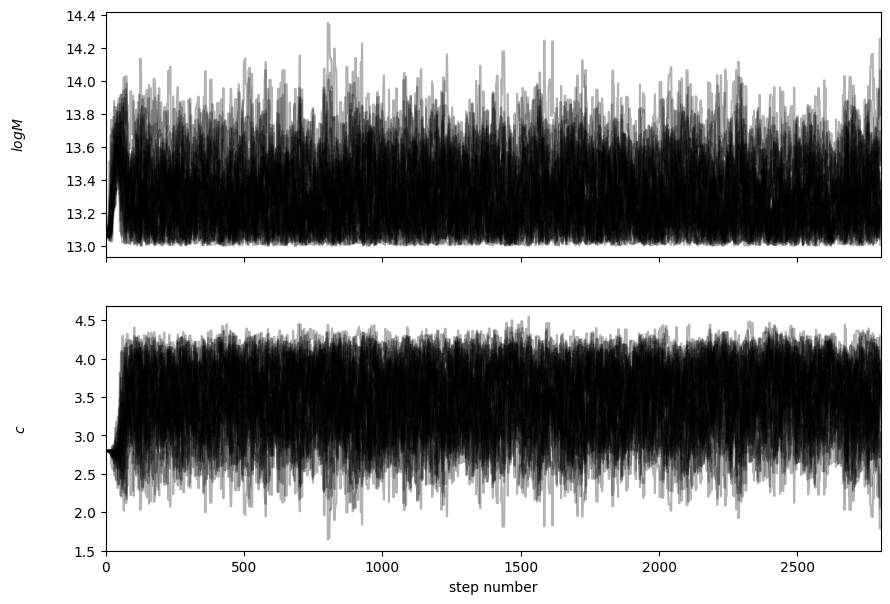

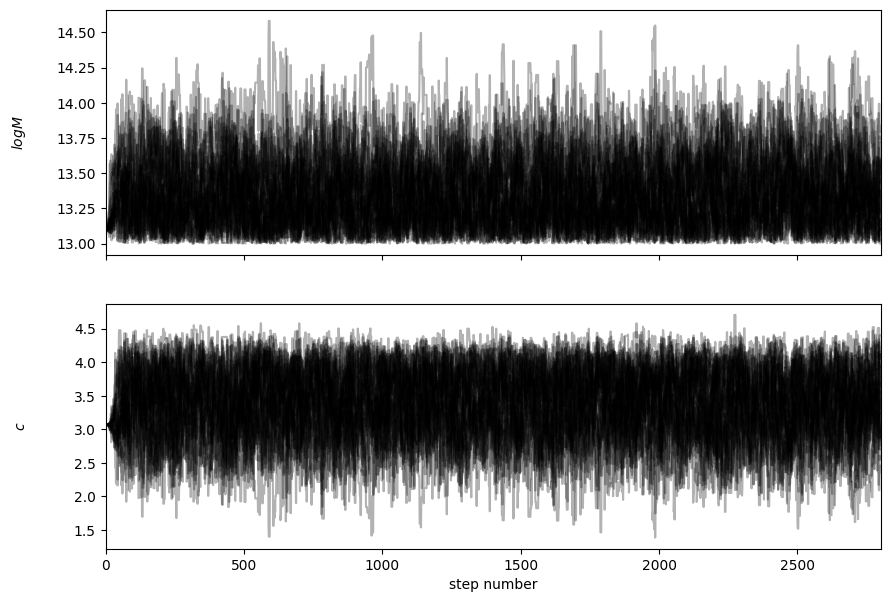

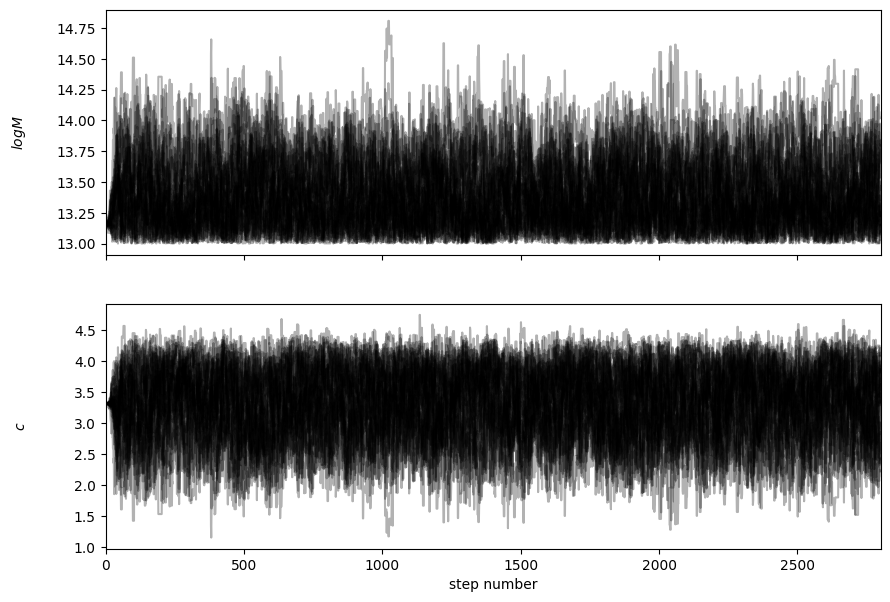

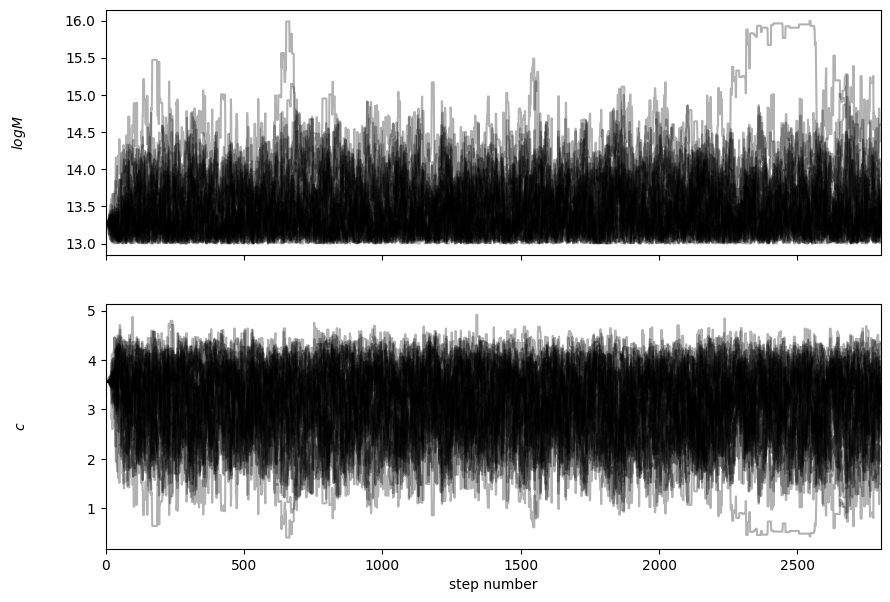

In [ ]:
#utilizzo EMCEE per ogni intervallo
!pip install emcee
import emcee
from scipy.optimize import minimize

#definiamo l'array di samples risultante e quello dei best_fits
samp_res = np.ndarray((5,88000,2)) #88000 viene da (nsteps-discarded)*nwalkers
#samp_res = np.ndarray((5,109760,2))
best_fits = np.ndarray((5,2))

#agisco su ogni gruppo
for i in range(5):

    # Definisco la funzione da minimizzare, ovvero la logPosterior cambiata di segno poichè voglio in realtà massimizzarla
    nll = lambda *args: -logPosterior(*args)

    # Genero i parametri iniziali casuali da una distribuzione normale
    #initial = np.array([14.5, 10.1]) * (1 + 0.01 * np.random.randn(2))
    initial = np.array([14.5, 3.0]) * (1 + 0.01 * np.random.randn(2))
    #initial = np.array([15.5, 0.5]) * (1 + 0.01 * np.random.randn(2))

    # Ottimizzo: trovo i valori dei parametri che massimizzano null (i "best-fit parameters")
    soln = minimize(nll, initial, args=(R_values, pd_medi_gruppo[i], cov_matrix[i],z_medi_gruppo[i]))
    logM_bf, c_bf = soln.x
    print()
    print("Gruppo:",i+1)
    print("Best-fit parameters:", soln.x)
    #registro i best-fits
    best_fits[i] = soln.x

    #NB:La funzione restituisce un oggetto OptimizeResult che contiene le informazioni sul risultato della minimizzazione, tra cui il valore del minimo, la soluzione dei parametri e il messaggio di uscita.
    #L'attributo x dell'oggetto OptimizeResult contiene la soluzione dei parametri della funzione obiettivo.
    #In altre parole, sol.x è un vettore che contiene i valori dei parametri che minimizzano la funzione obiettivo.

    # Perturbo i parametri iniziali e inizializzo i walkers che vanno ad esplorare lo spazio dei parametri
    #Infatti laa miglior tecnica per esplorare lo spazio delle fasi, sembrerebbe quella di partire da un intorno dei valori di "best-fit".
    pos = soln.x * (1 + 1e-4 * np.random.randn(32, 2))
    nwalkers, ndim = pos.shape

    # Uso l'Ensemble Sampler emcee
    sampler = emcee.EnsembleSampler(nwalkers, ndim, logPosterior, args=(R_values, prof_dens_medio, cov_matrix[i],z_medio))
    #print("shape cov[i]:", np.shape(cov_matrix[i]))
    sampler.run_mcmc(pos, 2800, progress=True);
    #sampler.run_mcmc(pos, 3500, progress=True);

    #trovo il tempo di autocorrelazione (il tempo di autocorrelazione può essere utilizzato per determinare quanti passaggi del MCMC sono necessari per ottenere una catena Markov che sia approssimativamente indipendente.)
    tau = sampler.get_autocorr_time()
    print("autocorr_time:", tau)

    #ottengo dal sampler la "catena appiattita" ed elimino la fase di burn-in
    #La catena Markov appiattita è una matrice che contiene tutti i valori della catena Markov, uno per ogni parametro.
    #invece sampler.get_chain() mi dà una matrice (2800,32,2)
    flat_samples = sampler.get_chain(discard=50, flat=True)
    #flat_samples = sampler.get_chain(discard=70, flat=True)

    print("flat samples shape:", flat_samples.shape)
    samp_res[i] = flat_samples

    #creo due plot di distribuzione della catena Markov (per ogni gruppo)

    #creo gli spazi per i due subplots
    fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
    #ottengo la catena Markov (sequenza di valori che rappresenta le stime dei parametri del modello probabilistico) dal sampler.
    samples = sampler.get_chain()
    print("samples shape:", np.shape(samples))
    #etichetto gli assi dei due plot
    labels = ["$logM$", "$c$"]

    for j in range(ndim):
        #assegno l'attuale subplot alla variabile ax
        ax = axes[j]
        #crea un plot della distribuzione della catena Markov per il parametro i.
        ax.plot(samples[:, :, j], "k", alpha=0.3) #"k" indica che la linea del plot sarà di colore nero e alpha che sarà di opacità 0,3.
        #gestisco le etichette e la loro posizione
        ax.set_xlim(0, len(samples))
        ax.set_ylabel(labels[j])
        ax.yaxis.set_label_coords(-0.1, 0.5)
        axes[-1].set_xlabel("step number"); #imposto l'etichetta dell'asse x del secondo subplot.


**COMMENTI**: Questi plot mostrano ad ogni step della catena di Markov le posizioni assunte dai walkers nello spazio dei parametri. Da questo plot osserviamo che le catene oscillano tutte attorno ad un certo valore che sarà il valore più probabile del parametro (in corrispondenza di esso troveremo il picco della Posterior distribution), senza occupare tutto lo spazio dei parametri; questo, insieme ad un tempo di autocorrelazione piccolo rispetto al numero di passi, mi indica una buona convergenza.


**Riportare il valore di best-fit, il valor medio ed errore associato ad ogni parametro; fare
un grafico triangolare per ogni intervallo di ricchezza per mostrare i posteriors
ottenuti sui due parametri. Verificare la bonta' del fit calcolando il chi-quadro per i best fit
parameters, e confrontando i dati con ~100 valori di M e c estratti dalle catene;
commentare i risultati.**

**NOTA**: Il valore medio di un parametro, data una catena ottenuta con un metodo MCMC, è semplicemente la media dei valori del parametro calcolati per ogni punto della catena.
Il valore best-fit, invece, è il valore del parametro che massimizza la Likelihood.

In [ ]:
#Riporto ora il valore di best-fit
for i in range(5):
  print("best fit values [logM,c] gruppo",i,":",best_fits[i])


best fit values gruppo 0 : [13.04727891  2.67712167]
best fit values gruppo 1 : [13.06844058  2.79771985]
best fit values gruppo 2 : [13.10818495  3.06710926]
best fit values gruppo 3 : [13.15976588  3.31349592]
best fit values gruppo 4 : [13.26737028  3.56817404]


Per gruppo 1
valore medio logM: 13.288852297454548
con errore: 0.18453725251803602
valore medio c: 3.5300527004688314
con errore: 0.41728387295738567

Per gruppo 2
valore medio logM: 13.313662819069506
con errore: 0.2024205777711679
valore medio c: 3.4733698047907224
con errore: 0.4519808660376135

Per gruppo 3
valore medio logM: 13.348332091907965
con errore: 0.23487411338245814
valore medio c: 3.4037350293969144
con errore: 0.5158144340299017

Per gruppo 4
valore medio logM: 13.385058719382986
con errore: 0.2711457918896509
valore medio c: 3.328324279785429
con errore: 0.5820174100929509

Per gruppo 5
valore medio logM: 13.49897513894891
con errore: 0.3798218056188781
valore medio c: 3.119638741862359
con errore: 0.7342557663216586



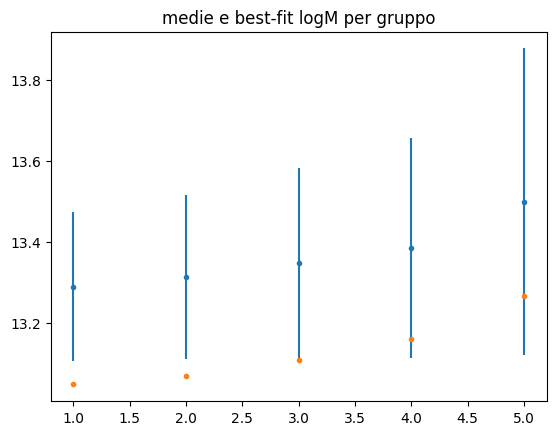

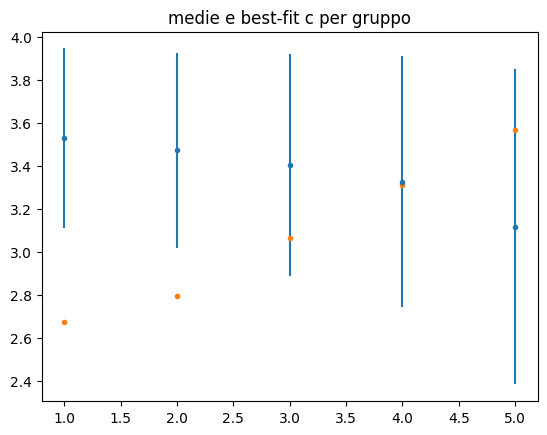

In [ ]:
#Riporto ora il valore medio ed errore associato ad ogni parametro

# ricorda la shape di samp_res = np.ndarray((5,109760,2))
mean_logM = np.zeros(5)
mean_c = np.zeros(5)
devstd_logM = np.zeros(5)
devstd_c = np.zeros(5)

for i in range(5):
   #print(np.shape(samp_res[i,:,0]))
   mean_logM[i] = np.mean(samp_res[i,:,0])
   mean_c[i] = np.mean(samp_res[i,:,1])
   devstd_logM[i] = np.std(samp_res[i,:,0])
   devstd_c[i] = np.std(samp_res[i,:,1])
   print("Per gruppo",i+1)
   print("valore medio logM:",mean_logM[i])
   print("con errore:", devstd_logM[i])
   print("valore medio c:", mean_c[i])
   print("con errore:", devstd_c[i])
   print()

group_number = [1,2,3,4,5]
#print(np.shape(best_fits))
plt.errorbar(group_number,mean_logM,devstd_logM,xerr=None, fmt='.')
plt.plot(group_number,best_fits[:,0],'.')
plt.title("medie e best-fit logM per gruppo")
plt.show()
plt.errorbar(group_number,mean_c,devstd_c,xerr=None, fmt='.')
plt.plot(group_number,best_fits[:,1],'.')
plt.title("medie e best-fit c per gruppo")
plt.show()


**COMMENTI**: Posso notare che i valori medi per logM e c ottenuti sono compatibili tra i vari gruppi (dati in blu), e non sempre invece compatibili con il best-fit rispettivo (in arancione). Infatti le due cose non necessariamente coincidono.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 12.3 MB/s eta 0:00:00


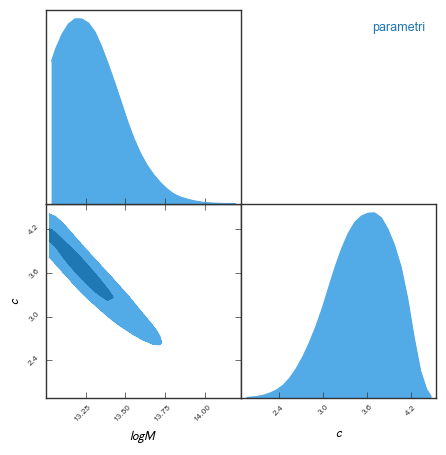

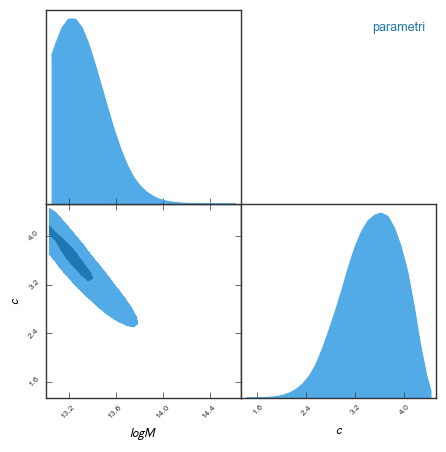

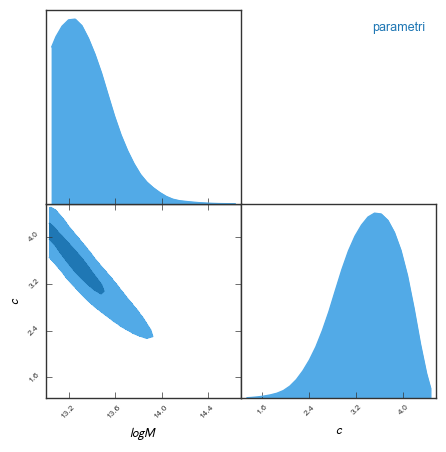

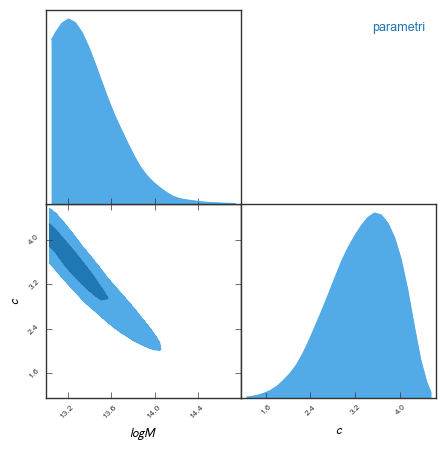

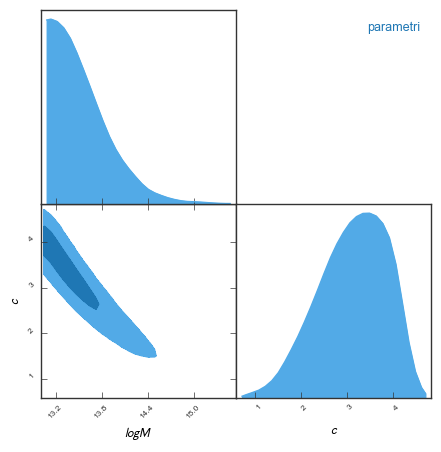

In [ ]:
#Creo un grafico triangolare per ogni intervallo di ricchezza per mostrare i posteriors ottenuti sui due parametri

!pip install pygtc
import pygtc

#questo passaggio è solo per non avere il warning. "WARNING:matplotlib.font_manager:findfont: Font family 'Arial' not found."
import matplotlib.font_manager as fm
# Get the path to the Arial font file
font_file = "/content/ARIAL.TTF"

# Add the Arial font to Matplotlib's font cache
fm.fontManager.addfont(font_file)

#creo ora il grafico effettivamente
for i in range(5):
  GTC = pygtc.plotGTC(chains=samp_res[i],
                    paramNames=['$logM$','$c$'],
                    chainLabels=['parametri'],
                    figureSize='MNRAS_page')


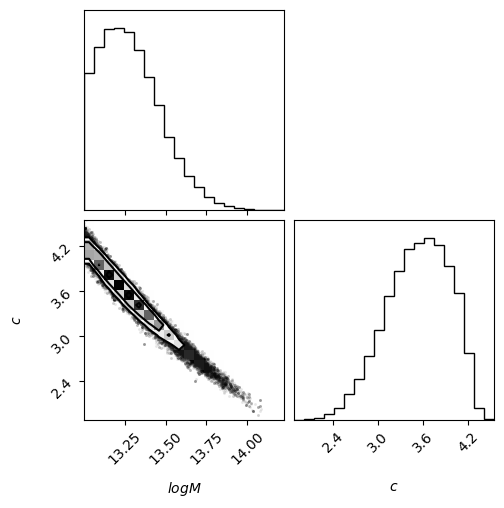

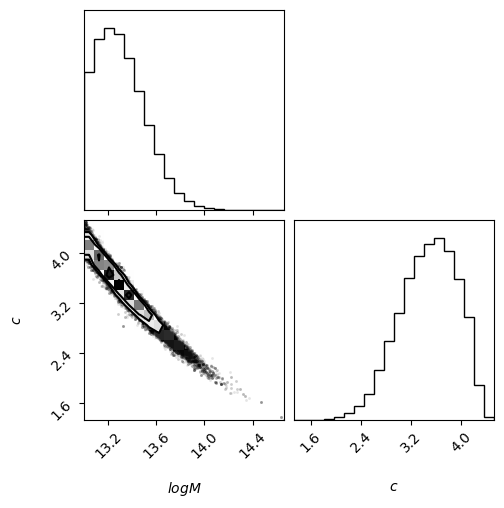

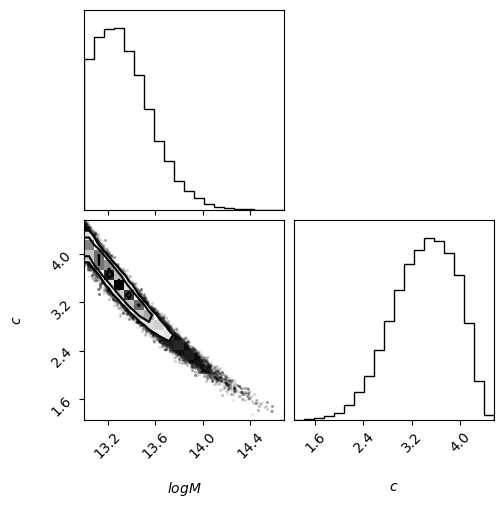

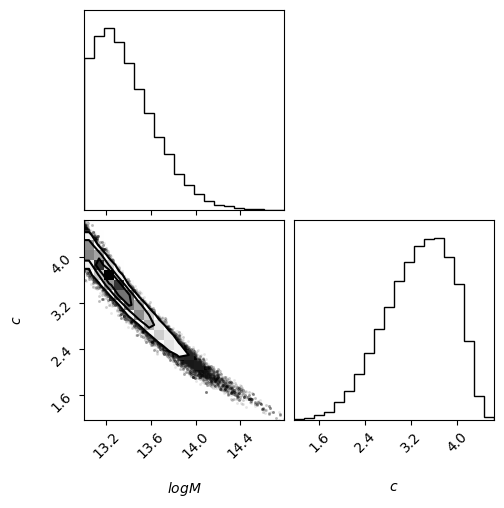

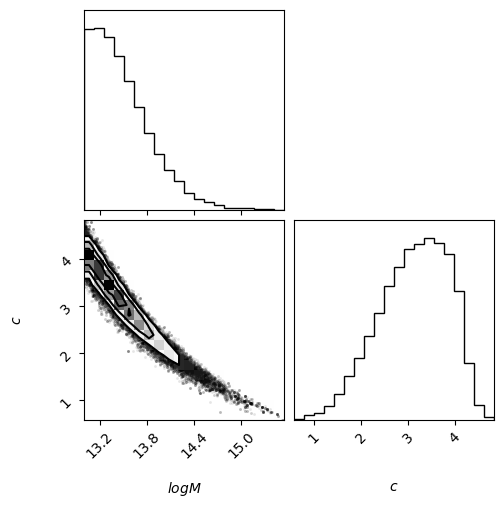

In [ ]:
#oppure la stessa cosa la posso fare con corner
!pip install corner
import corner as corner

for i in range(5):
  fig = corner.corner(samp_res[i],
                    labels=['$logM$','$c$'])


**COMMENTI:**
In questo grafico triangolare possiamo osservare vedere la Posterior distribution e le distribuzioni marginali:
- Si osserva che la Posterior distribution è asimmetrica. Quest'ultimo fatto potrebbe esser dovuto all'assimmetria dei dati.
-  Come già accennato, in corrispondenza dei picchi delle marginali (in alto e a destra), troviamo sull'asse delle ascisse valori più probabili per i parametri. Inoltre, dalla larghezza delle distribuzioni, possiamo avere un'idea anche dell'incertezza sulla loro stima.
- Infine, dal grafico in basso a sinistra, deduciamo, vista l'inclinazione dell'ellisse, la presenza di correlazione negativa tra i parametri logM e c: a valori più alti di logM, corrispondono valori più piccoli per c. Per quanto riguarda invece la colorazione dell'ellisse, le zone più scure indicano una maggior presenza di dati campionati in tale regione, cioè coppie di stime per i parametri (logM,c) più probabili.

**NOTA**: mentre il valore medio rimane sempre tra 3 e 4 per c, e attorno a 13 per logM, il valore di best-fit ha una forte dipendenza dai parametri da cui parto per il calcolo della funzione minimize(). Questa infatti trova i valori dei parametri che minimizzano la funzione di obiettivo nll(), ovvero massimizzano la logPosterior, ovvero nell'intervallo in cui la Prior è non nulla, (essendo la logPrior costante) massimizzano la Likelihood (cioè massimizzano la probabilità di trovare i dati ottenuti).
Quando si cambiano i valori di initial, si sta cambiando l'area dello spazio dei parametri che viene esplorata dalla funzione minimize(), quindi è possibile che si trovino valori di parametri che minimizzano la funzione di obiettivo ancora di più. Si può tuttavia far riferimento al chi-quadro per avere un'idea della bontà del fit.




[0.46890868 0.37731815 0.21717304 0.13750378 0.05384691]


Text(0.5, 1.0, 'chi2 per gruppo')

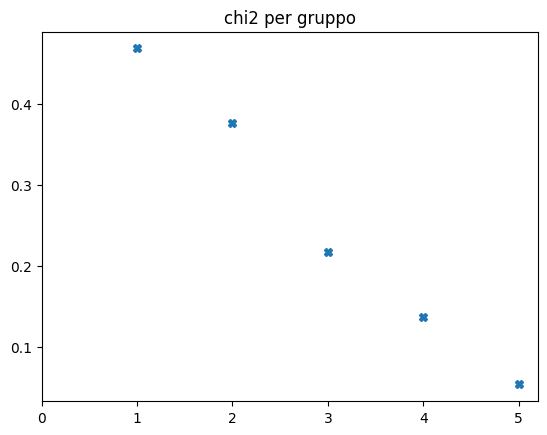

In [ ]:
#Verifico la bonta' del fit calcolando il chi-quadro per i best fit parameters di ogni gruppo.

#calcolo i valori di profilo di densità che si ottengono usando i best_fits per ogni gruppo
#RICORDA: print(np.shape(best_fits)) #-->(5,2) cioè 5 righe con ognuna i best-fit-parameters
#il chi quadro è dato dalla somma dei quadrati di (x-mu)/(dev std)
#x sono i prof.densità calcolati con i best_fit parameters, mentre mu e la dev std sono quelle delle medie dei dati forniti

pd_best = np.ndarray((5,8)) #alla fine avrò cinque righe, ognuna con un valore di pd per raggio nel risp. gruppo
chi2 = np.zeros(5)

#per ogni gruppo calcolo il chi-quadro
for i in range(5):
  pd_best[i] = NFW(R_values,(10**best_fits[i,0]),best_fits[i,1],z_medi_gruppo[i])
  scarto = pd_best[i] - pd_medi_gruppo[i]
  #print(np.shape(scarto))
  addendo = (scarto)**2/((devstd_pd_medi_gruppo[i])**2)
  chi2[i] = sum(addendo)

group_number = [1,2,3,4,5]
print(chi2)
plt.plot(group_number,chi2,'X')
plt.xticks(np.arange(0, 6, 1)) #in questo modo sull'asse delle x ho solo i valori interi che mi interessano
plt.title("chi2 per gruppo")


**COMMENTO**: La χ^2 è sempre abbastanza piccola (minore di uno) quindi questo significa che i dati praticamente coincidono con quanto atteso, ovvero il test di chi-quadro è non significativo, cioè la distribuzione teorica (ottenuta dal modello e dai best-fit parameters) è in accordo con i dati (le medie dei profili di densità.) In particolare si osserva che il fit utilizzando i "best-fit parameters" va migliorando al crescere della ricchezza.
Quest'affermazione la posso verificare anche con il successivo grafico, nel quale la linea tratteggiata rappresenta i profili di densità ottenuti con i parametri di best-fit, mentre i pallini rappresentano i profili di densità medi sperimentali.

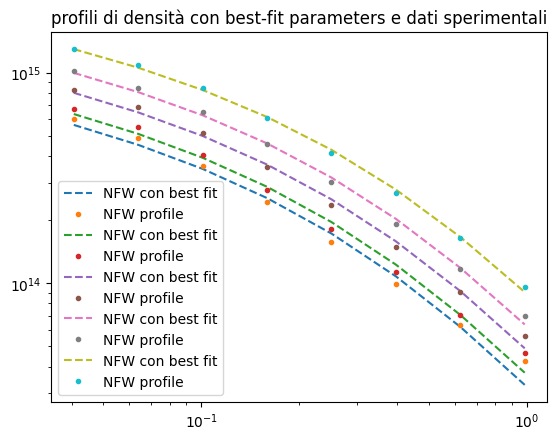

In [ ]:
#plotto i profili di densità ottenuti con i "best fit parameters" e i dati sperimentali
for i in range(5):
  plt.loglog(R_values, NFW(R_values,(10**best_fits[i,0]),best_fits[i,1],z_medi_gruppo[i]),'--',label = "NFW con best fit")
  plt.loglog(R_values, pd_medi_gruppo[i],'.', label = "NFW profile")
  plt.legend()
  plt.title("profili di densità con best-fit parameters e dati sperimentali")
  #plt.show() --> nel caso si volesse visualizzarli su grafici diversi

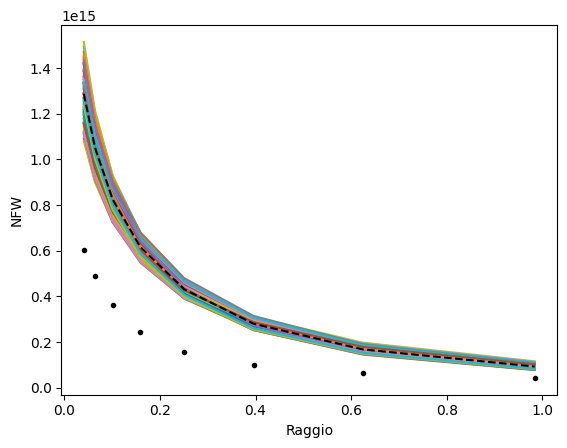

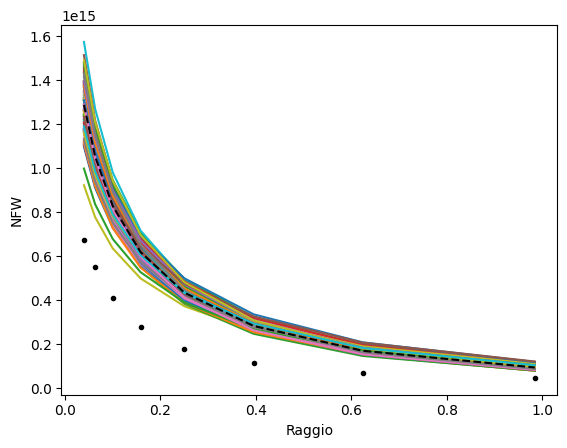

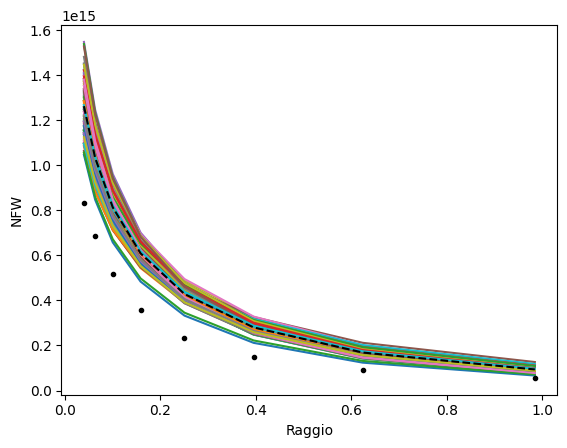

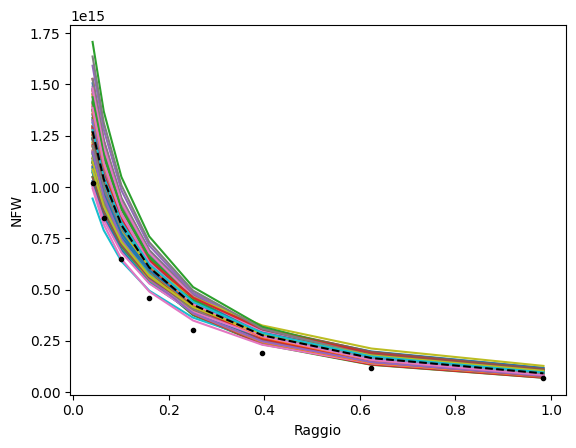

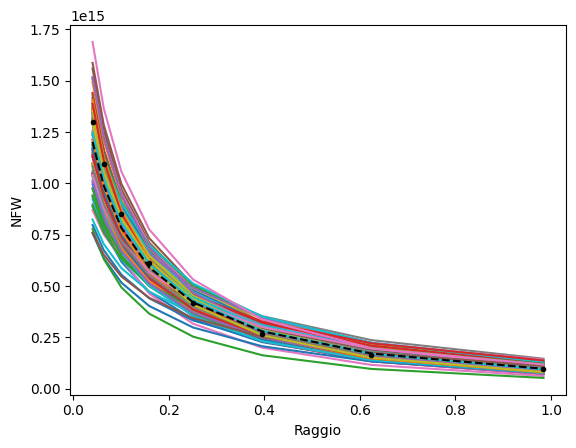

In [ ]:
#confronto i dati con ~100 valori di M e c estratti dalle catene casualmente

#estraggo casualmente 100 numeri: sono le posizioni degli array da cui prenderò M e c
# ricorda la shape di samp_res = np.ndarray((5,109760,2))
#entries = (np.random.randint(0,109760,100))
entries = (np.random.randint(0,88000,100))
#print(entries)

#come sempre ripeto l'azione per ogni gruppo
for i in range(5):

  simulated_NFW = np.ndarray((8,100))

  #prendo cento valori di logM e di c dalla catena
  chain_logM = np.zeros(100)
  chain_c = np.zeros(100)

  for j in range (100):
    k = entries[j]
    #print(i,k,0)
    #print(samp_res[i,k,0])
    chain_logM[j] = samp_res[i,k,0]
    chain_c[j] = samp_res[i,k,1]

    #calcolo NFW proveniente dai dati simulati (argomenti (r,M,c,z))
    simulated_NFW[:,j] = NFW(R_values,10**(chain_logM[j]),chain_c[j],z_medi_gruppo[i]) #qui ho 8 valori (uno per raggio, che cambiano 100 volte)

  #calcolo NFW proveniente dai dati veri
  sperimental_NFW = pd_medi_gruppo[i] #qui ho 8 valori che son sempre quelli (uno per raggio, per il dato gruppo)

  plt.plot(R_values,simulated_NFW)
  plt.plot(R_values,sperimental_NFW,'.',color = 'black')
  plt.plot(R_values,np.mean(simulated_NFW,axis=1),'--', color = 'black')
  plt.xlabel("Raggio")
  plt.ylabel("NFW")
  plt.show()


**COMMENTO**:
In questo grafico, per ogni gruppo, possiamo vedere rappresentato in diversi colori 100 profili di densità simulati a partire dai parametri stimati con il metodo MCMC ed estratti casualmente, e la media degli stessi in nero tratteggiato. I pallini neri rappresentano invece i valori medi dei profili di densità ottenuti sperimentalmente.

**NOTA**: Come già osservato nel plot iniziale dei profili di densità medi in funzione del raggio per i vari gruppi, il fatto che questi grafici non seguano esattamente l'andamento trovato nel grafico a nove pannelli, è solamente dovuto alla scala. Si è preferito fare un primo plot in scala cartesiana, ma possiamo facilmente visualizzare i dati in scala loglog come segue. Nel successivo grafico si è anche deciso di confrontare direttamente i profili di densità MEDI ottenuti dal modello con i 100 diversi parametri, con i profili di densità medi ottenuti sperimentalmente.

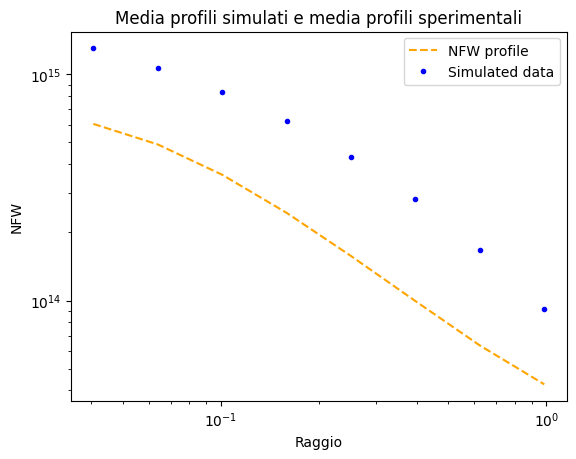

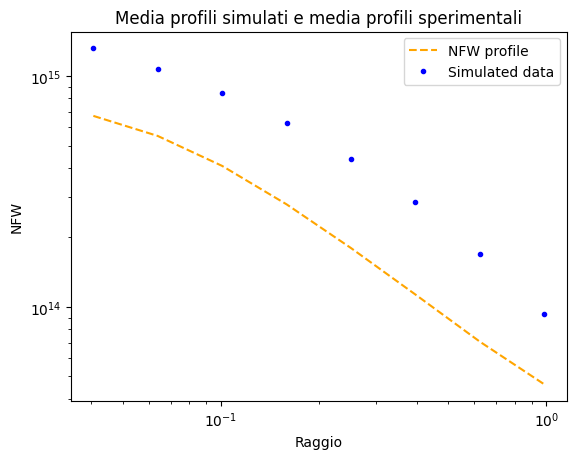

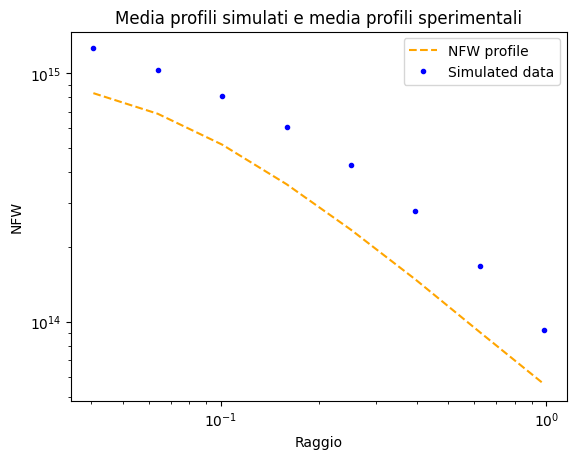

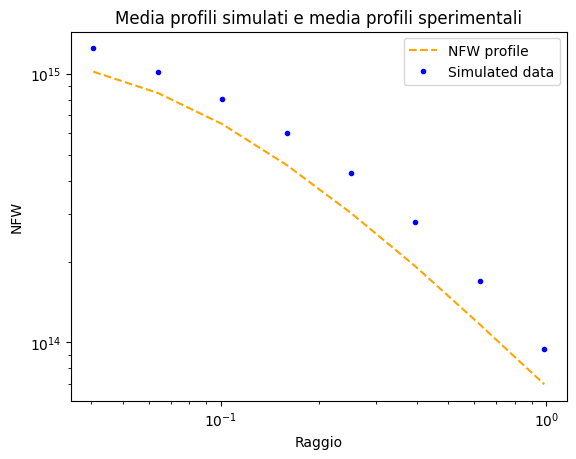

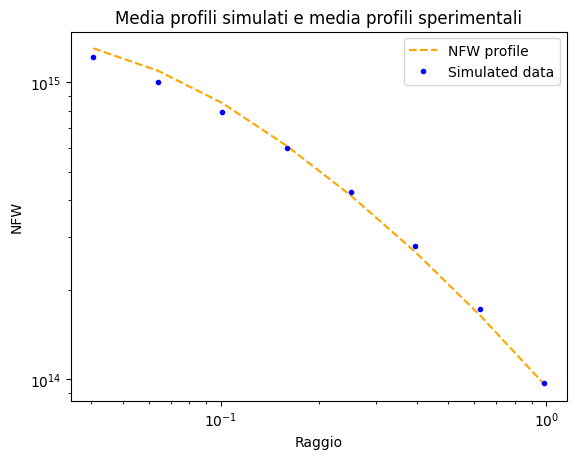

In [ ]:
#verifico l'ultima affermazione in nota

for i in range(5):

  simulated_NFW = np.ndarray((8,100))

  #prendo cento valori di logM e di c dalla catena
  chain_logM = np.zeros(100)
  chain_c = np.zeros(100)

  for j in range (100):
    k = entries[j]
    #print(i,k,0)
    #print(samp_res[i,k,0])
    chain_logM[j] = samp_res[i,k,0]
    chain_c[j] = samp_res[i,k,1]

    #calcolo NFW proveniente dai dati simulati (argomenti (r,M,c,z))
    simulated_NFW[:,j] = NFW(R_values,10**(chain_logM[j]),chain_c[j],z_medi_gruppo[i]) #qui ho 8 valori (uno per raggio, che cambiano 100 volte)

  #calcolo NFW proveniente dai dati veri
  sperimental_NFW = pd_medi_gruppo[i] #qui ho 8 valori che son sempre quelli (uno per raggio, per il dato gruppo)

  #plt.loglog(R_values,simulated_NFW)
  plt.loglog(R_values,sperimental_NFW,'--',color = 'orange',label = "NFW profile")
  plt.loglog(R_values,np.mean(simulated_NFW,axis=1),'.', color = 'blue',label = "Simulated data")
  plt.legend()
  plt.xlabel("Raggio")
  plt.ylabel("NFW")
  plt.title("Media profili simulati e media profili sperimentali")
  plt.show()


**COMMENTO:** Quello che posso quindi dedurre in conclusione è che i 100 fit con diversi parametri estratti casualmente dalla catena, seguono l'andamento dei dati sperimentali, e in particolare migliorano (convergono ad essi) all'aumentare del raggio e della ricchezza.
Vedo infatti che, mentre nei primi quattro gruppi ho tendenzialmente una sovrastima del profilo di densità rispetto al caso sperimentale, per l'ultimo gruppo in particolare, ottengo un grafico del tutto compatibile con quanto allegato nelle indicazioni dell'esercizio.
Il tutto potrebbe essere in accordo con il fatto che all'aumentare della ricchezza, si è mostrato che valor medio della distribuzione dei parametri e parametro di best-fit diventano compatibili e i parametri di best-fit sono tanto migliori quanto più aumenta la ricchezza. Infatti, come vediamo nel seguente grafico, in questo caso, fare la media dell'NFW calcolata su diversi parametri o calcolare la NFW sui parametri medi è più o meno lo stesso.  

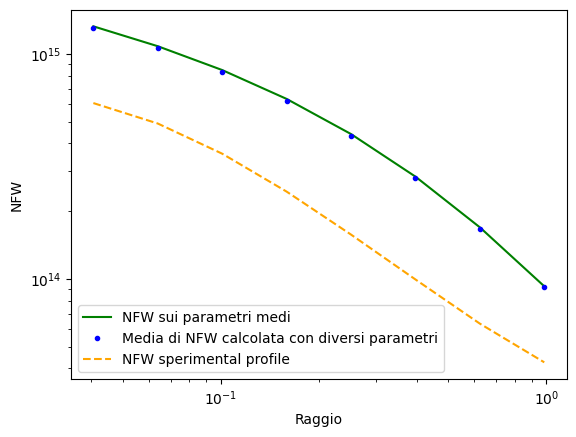

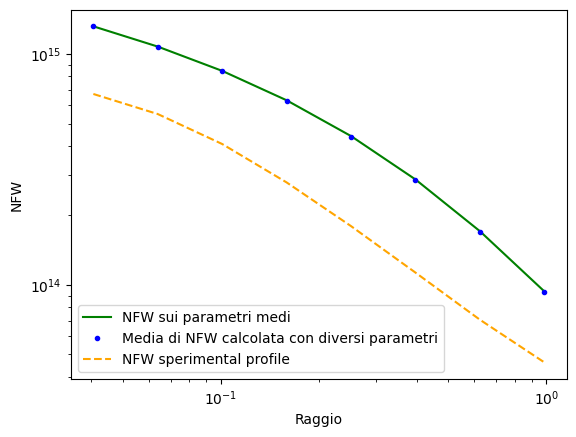

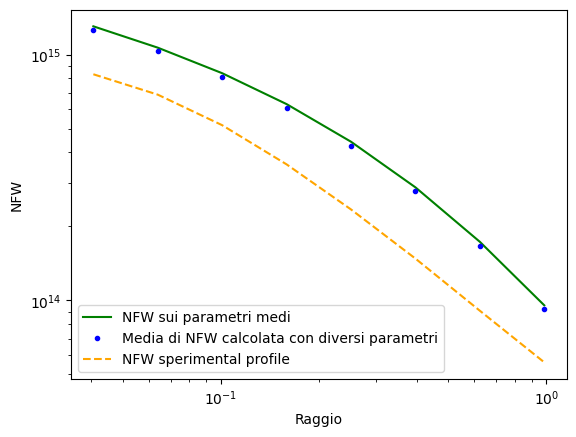

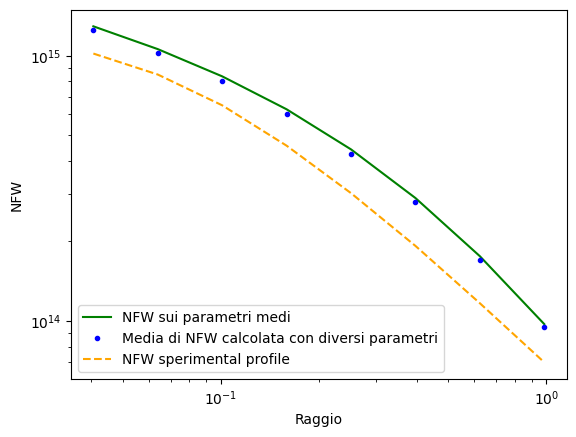

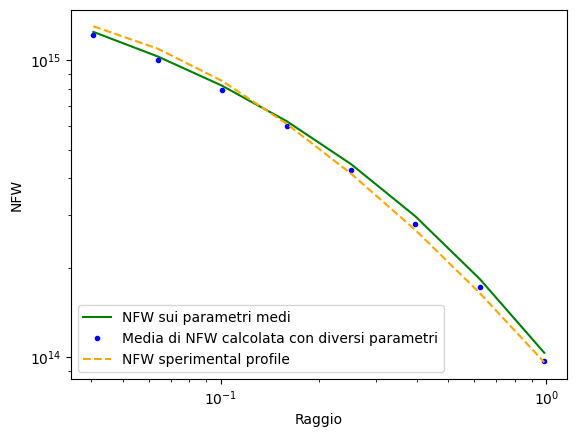

In [ ]:
#mi assicuro che è più o meno lo stesso fare la media degli NFW e calcolare gli NFW sui valori medi (in generale non è vero che la media di f(x) è uguale a f(xmedio))
for i in range(5):

  simulated_NFW = np.ndarray((8,100))

  #prendo cento valori di logM e di c dalla catena
  chain_logM = np.zeros(100)
  chain_c = np.zeros(100)

  for j in range (100):
    k = entries[j]
    #print(i,k,0)
    #print(samp_res[i,k,0])
    chain_logM[j] = samp_res[i,k,0]
    chain_c[j] = samp_res[i,k,1]

    #calcolo NFW proveniente dai dati simulati (argomenti (r,M,c,z))
    simulated_NFW[:,j] = NFW(R_values,10**(chain_logM[j]),chain_c[j],z_medi_gruppo[i]) #qui ho 8 valori (uno per raggio, che cambiano 100 volte)

  #calcolo NFW proveniente dai dati veri
  sperimental_NFW = pd_medi_gruppo[i]

  #plt.loglog(R_values,simulated_NFW)
  plt.loglog(R_values,NFW(R_values,(10**mean_logM[i]),mean_c[i],z_medi_gruppo[i]),'',color = 'green',label = "NFW sui parametri medi")
  plt.loglog(R_values,np.mean(simulated_NFW,axis=1),'.', color = 'blue',label = "Media di NFW calcolata con diversi parametri")
  plt.loglog(R_values,sperimental_NFW,'--',color = 'orange',label = "NFW sperimental profile")
  plt.legend()
  plt.xlabel("Raggio")
  plt.ylabel("NFW")
  plt.show()
